# Pymaceuticals Inc.
---

### Analysis
 1) As seen in box 99, the Capomulin regimen for the example mouse significantly reduced its tumor volume over time. 
 2) Mouse weight and tumor volume are very strongly correlated for the mice on the Capomulin regimen, as seen in box 88 and 94.
 3) As seen in box 8 based off mean tumor volume, it looks like Capomulin and Infubinol are given to mice with lower tumor volumes, so maybe those mice have less aggressive tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df=mouse_df.set_index(["Mouse ID", "Timepoint"])
idlist=mouse_df.index.tolist()
newlist=[]
duplist=[]
for i in idlist:
    if i not in newlist:
        newlist.append(i)
    else:
        duplist.append(i)
duplist

[('g989', 0), ('g989', 5), ('g989', 10), ('g989', 15), ('g989', 20)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df=mouse_df.drop("g989")
mouse_df

Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
b128     0                   45.000000                 0    Capomulin  Female   
         5                   45.651331                 0    Capomulin  Female   
         10                  43.270852                 0    Capomulin  Female   
         15                  43.784893                 0    Capomulin  Female   
         20                  42.731552                 0    Capomulin  Female   
...                                ...               ...          ...     ...   
m601     25                  33.118756                 1    Capomulin    Male   
         30                  31.758275                 1    Capomulin    Male   
         35                  30.834357                 1    Capomulin    Male   
         40                  31.378045                 1    Capomulin    Male   
         45                  28.430964                 1    Capomulin    Male   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
b128     0                   9          22  
         5                   9          22  
         10                  9          22  
         15                  9          22  
         20                  9          22  
...                        ...         ...  
m601     25                 22          17  
         30                 22          17  
         35                 22          17  
         40                 22          17  
         45                 22          17  

[1880 rows x 6 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df.index.get_level_values("Mouse ID").nunique() 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats=pd.DataFrame(mouse_df.groupby(mouse_df["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))
tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

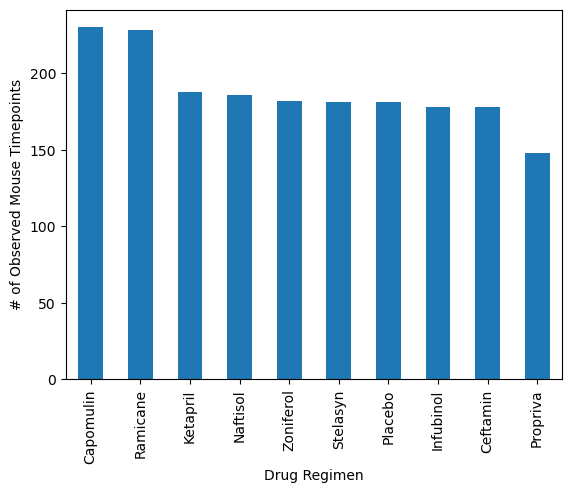

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts=mouse_df["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

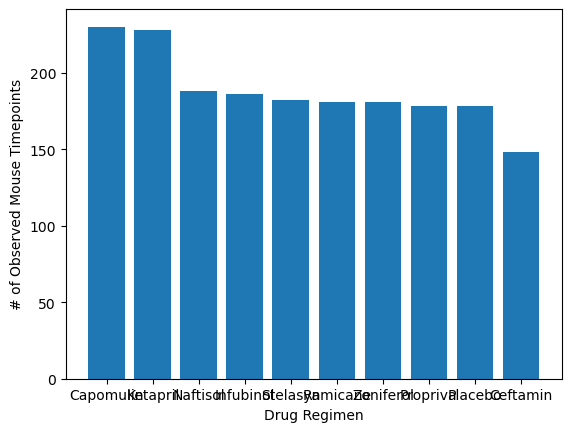

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_names=mouse_df["Drug Regimen"].unique()
drug_regimen_counts=mouse_df["Drug Regimen"].value_counts()
plt.bar(drug_regimen_names,drug_regimen_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

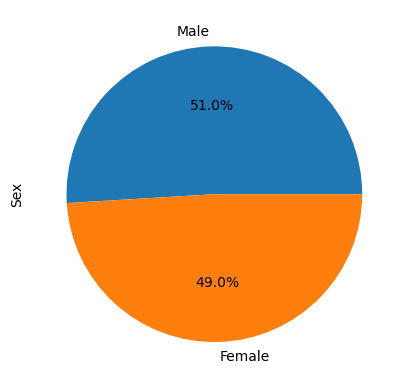

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=mouse_df["Sex"].value_counts()
mouse_pie=gender_count.plot(kind="pie",labels=gender_count.index,autopct='%.1f%%')

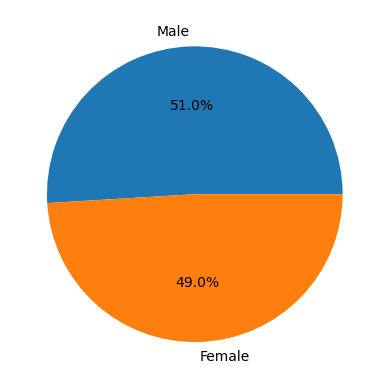

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
categories=["Male","Female"]
gender_count=mouse_df["Sex"].value_counts()
plt.pie(gender_count, labels=categories, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = mouse_df.loc[(mouse_df["Drug Regimen"]=="Capomulin")|\
                          (mouse_df["Drug Regimen"]=="Ramicane")|\
                          (mouse_df["Drug Regimen"]=="Infubinol")|\
                          (mouse_df["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
# reset indices temporarily 
treatments = treatments.reset_index()
last_timepoints = treatments.groupby("Mouse ID")["Timepoint"].idxmax()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = treatments.loc[last_timepoints]
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
342,a203,45,67.973419,2,Infubinol,Female,20,23
86,a251,45,65.525743,1,Infubinol,Female,21,25
526,a275,45,62.999356,3,Ceftamin,Female,20,28
137,a411,45,38.407618,1,Ramicane,Male,3,22
147,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
413,y769,45,68.594745,4,Ceftamin,Female,6,27
735,y793,45,31.896238,2,Capomulin,Male,17,17
403,y865,45,64.729837,3,Ceftamin,Male,23,26
303,z578,45,30.638696,0,Ramicane,Male,11,16


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_types=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles= final_tumor_volumes["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq= quartiles[.25]
upperq= quartiles[.75]
iqr= upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
outliers=final_tumor_volumes.loc[(final_tumor_volumes["Tumor Volume (mm3)"]<lower_bound) |\
                                     (final_tumor_volumes["Tumor Volume (mm3)"]>upper_bound)]

# Locate the rows which contain mice on each drug and get the tumor volumes
outcomes= final_tumor_volumes[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
outcomes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
342,a203,Infubinol,67.973419
86,a251,Infubinol,65.525743
526,a275,Ceftamin,62.999356
137,a411,Ramicane,38.407618
147,a444,Ramicane,43.047543
...,...,...,...
413,y769,Ceftamin,68.594745
735,y793,Capomulin,31.896238
403,y865,Ceftamin,64.729837
303,z578,Ramicane,30.638696


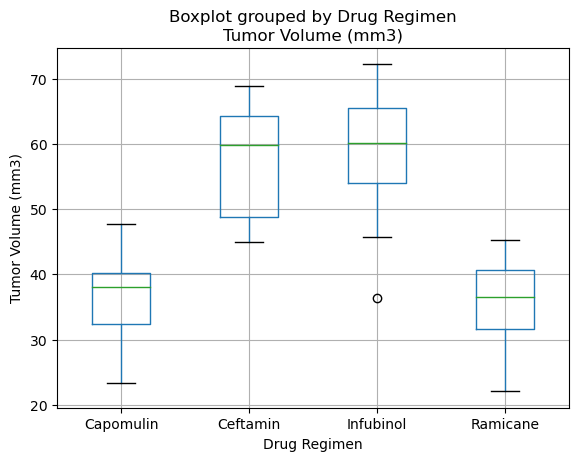

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outcomes.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

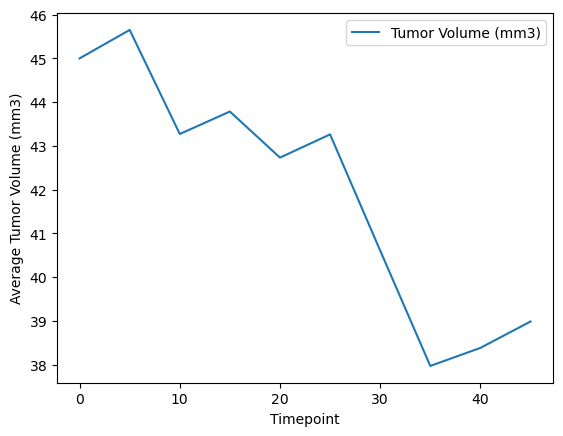

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"]=="Capomulin"]
desired_mouse_id= "b128" #must choose a mouse from the capomulin_mouse dataframe
#capomulin_df = capomulin_df.reset_index()
capomulin_choice = capomulin_df.loc[capomulin_df["Mouse ID"]==desired_mouse_id]
capomulin_choice.plot(x="Timepoint",y="Tumor Volume (mm3)",kind='line')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

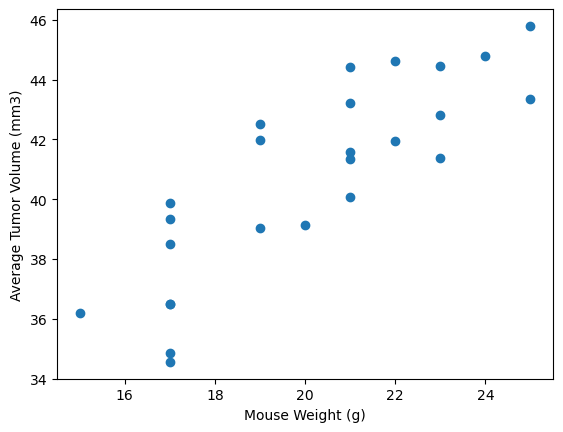

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

id_group = capomulin_df.groupby("Mouse ID")
average_weight = id_group["Weight (g)"].mean()
average_tumor = id_group["Tumor Volume (mm3)"].mean()
plt.scatter(average_weight, average_tumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


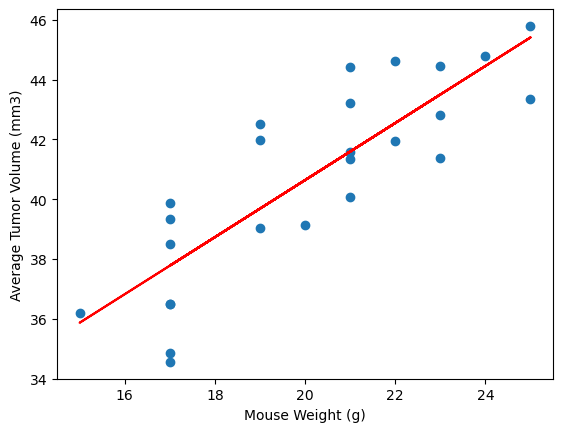

In [94]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_weight, average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(average_weight, average_tumor)
pe_fit = pe_slope*average_weight + pe_int
plt.scatter(average_weight, average_tumor)
plt.plot(average_weight,pe_fit,"-",color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()